In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Global_Superstore_Data.csv")
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
data.shape

(51290, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


# Part 1:- Filter the most consistently profitable market segment

Step 1:- Convert Order Date to year-month

In [5]:
data["Order Date"] = pd.to_datetime(data["Order Date"]).dt.to_period('m')

In [6]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


Step 2:- Create Market_Segment column

In [7]:
data["Market_Segment"] = data["Market"] + "_" + data["Segment"]

In [8]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


Step 3:- Aggregate data by month

In [9]:
data_agg = data.pivot_table(index="Order Date", values="Profit", columns="Market_Segment", aggfunc="sum")

In [10]:
data_agg.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [11]:
data_agg.shape

(48, 21)

Step 4:- Split data_agg into train and test

In [12]:
train_len = 42
train_data_agg = data_agg[:train_len]
test_data_agg = data_agg[train_len:]

In [13]:
train_data_agg.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


Step 5:- Use train data to find the CoV value for various market segments

In [14]:
covs = pd.DataFrame(columns = ["segment","cov"])

In [15]:
for i in train_data_agg.columns:
    temp = {"segment":i,"cov":np.std(train_data_agg[i])/np.mean(train_data_agg[i])}
    covs = covs.append(temp, ignore_index=True)

In [16]:
covs.sort_values(by="cov")

,segment,cov
0,APAC_Consumer,0.522725
1,APAC_Corporate,0.530051
12,EU_Consumer,0.595215
15,LATAM_Consumer,0.683770
13,EU_Corporate,0.722076
16,LATAM_Corporate,0.882177
14,EU_Home Office,0.938072
2,APAC_Home Office,1.008219
18,US_Consumer,1.010530
19,US_Corporate,1.071829


The most consistently profitable market segment is which has least value of cov. In this case, it is APAC_Consumer 

# Part 2:- Forecasting for the most consistently profitable market segment

In [17]:
data_market_seg = data[data.Market_Segment == "APAC_Consumer"]
data_market_seg.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-07,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [18]:
data_market_seg = data_market_seg[["Order Date","Sales"]]
data_market_seg.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [19]:
data_market_seg_agg = data_market_seg.groupby(["Order Date"]).sum()

In [20]:
data_market_seg_agg.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [21]:
data_market_seg_agg.shape

(48, 1)

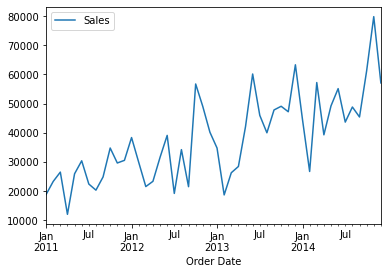

In [22]:
data_market_seg_agg.plot()
plt.show()

In [23]:
data_market_seg_agg.index

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
             '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
            dtype='period[M]', name='Order Date', freq='M')

In [24]:
data_market_seg_agg = data_market_seg_agg.to_timestamp()

In [25]:
data_market_seg_agg.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

## Time series Decomposition

### Additive seasonal decomposition

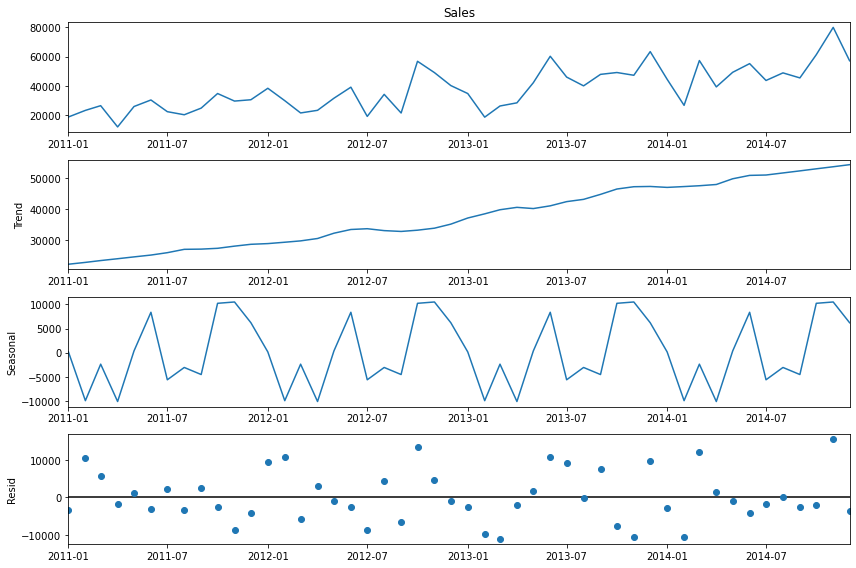

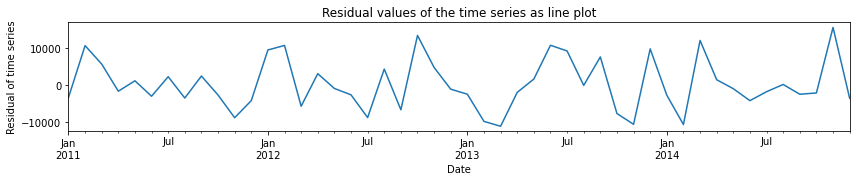

In [26]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data_market_seg_agg.Sales, model='additive',extrapolate_trend='freq', period=12) # additive seasonal index
decomposition.plot()
plt.show()

decomposition_residual=decomposition.resid
ax= decomposition_residual.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series as line plot')
plt.show()

- The trend seems to be almost linearly increasing with few negligible crests and troughs
- The seasonal pattern, though not evident from the actual Sales plot, has been captured but doesn't look to be a strong pattern
- There is no pattern observed in Residuals graph

### Multiplicative seasonal decomposition

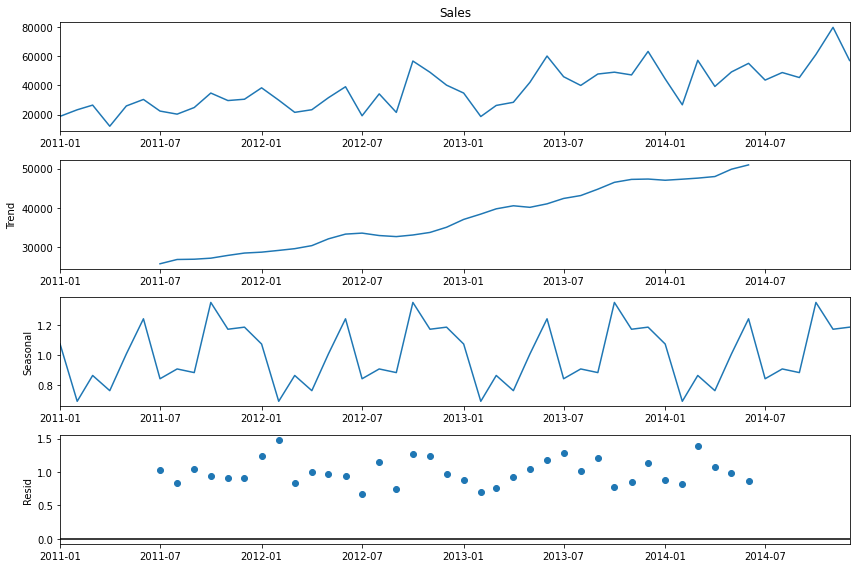

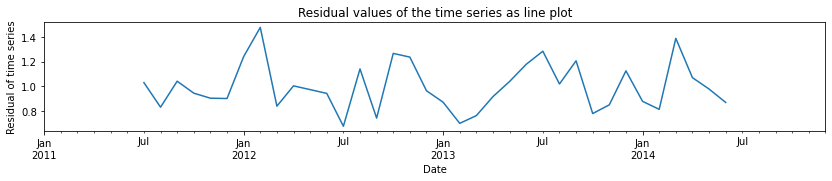

In [27]:
decomposition = sm.tsa.seasonal_decompose(data_market_seg_agg.Sales, model='multiplicative') # multiplicative seasonal index
decomposition.plot()
plt.show()

decomposition_residual=decomposition.resid
ax= decomposition_residual.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series as line plot')
plt.show()

- The trend seems to be almost linearly increasing with few evident crests and troughs
- The seasonal pattern, though not evident from the actual Sales plot, has been captured but doesn't look to be a strong pattern
- There is no pattern observed in Residuals graph

## Splitting data into training and testing data

In [28]:
train_len = 42
train_market_seg = data_market_seg_agg[:train_len]
test_market_seg = data_market_seg_agg[train_len:]

## Exponential models

### Simple Exponential model

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_market_seg['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params

C:\Users\dsanjaykarmiani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


{'smoothing_level': 0.24674418604651163,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 18821.989799999996,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
y_hat_ses = test_market_seg.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

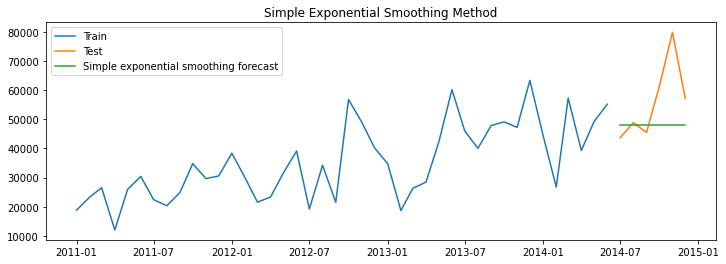

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_ses['ses_forecast'])/test_market_seg['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74


The simple exponential smoothing method has captured the level in the time series data. But other components like trend and seasonality isn't captured. Hence high RMSE and MAPE values

### Holt's exponential model 

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_market_seg['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\dsanjaykarmiani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [35]:
y_hat_holt = test_market_seg.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_market_seg))

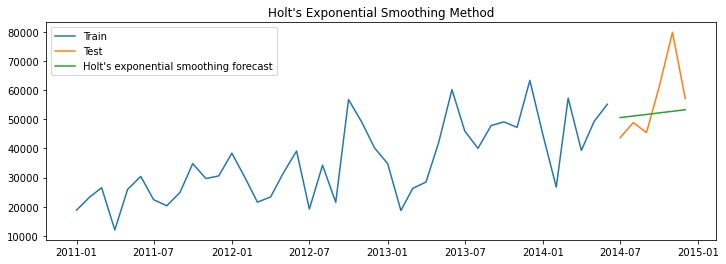

In [36]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [37]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_holt['holt_forecast'])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93


The Holt's exponential smoothing method has captured the level and trend in the time series data. Hence lower RMSE and MAPE values than Simple exponential smoothing method. But still seasonal component hasn't been captured.

### Holt Winters' additive method with trend and seasonality

In [38]:
model = ExponentialSmoothing(np.asarray(train_market_seg['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\dsanjaykarmiani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [39]:
y_hat_hwa = test_market_seg.copy()
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test_market_seg))

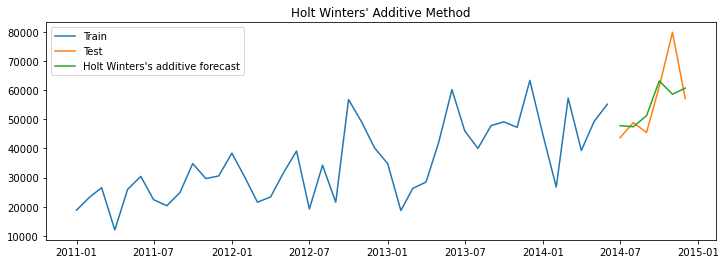

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [41]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_hwa['hw_forecast'])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17


Since Holt Winter's method captures all three components level, trend and seasonality, the RMSE and MAPE values are the lowest as compared to others. Since the seasonality pattern was not so strong, the forecast doesn't follow the actual values to the point.

### Holt Winter's multiplicative method with trend and seasonality

In [42]:
model = ExponentialSmoothing(np.asarray(train_market_seg['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\dsanjaykarmiani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [43]:
y_hat_hwm = test_market_seg.copy()
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test_market_seg))

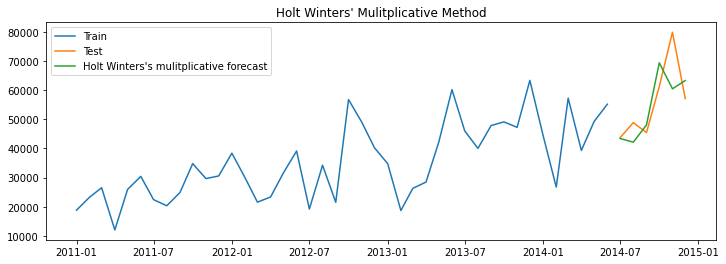

In [44]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [45]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_hwm['hw_forecast'])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


Since Holt Winters' method captures all three components level, trend and seasonality, the RMSE and MAPE values are lower than others except for Holt Winters' additive method. Since the seasonality pattern was not so strong, the forecast doesn't follow the actual values to the point.

## Auto Regressive methods

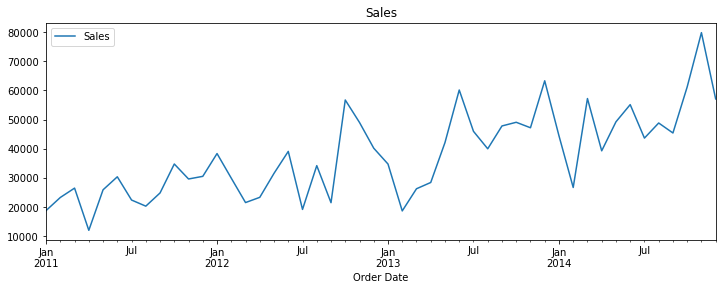

In [46]:
data_market_seg_agg['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [47]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_market_seg_agg['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


The series is stationary as p-value is less than 0.05. 

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [48]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_market_seg_agg['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


The series is not stationary as p-value is less than 0.05

Types of Stationarity  
Let us understand the different types of stationarities and how to interpret the contradictory results of the above tests(not contradictory in actual as indicated below).

Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.  
Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.  
Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.
It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

Case 1: Both tests conclude that the series is not stationary -> series is not stationary  
Case 2: Both tests conclude that the series is stationary -> series is stationary  
Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary  
Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary  

For our data, Case 4 applies.

### Box Cox transformation to make variance constant

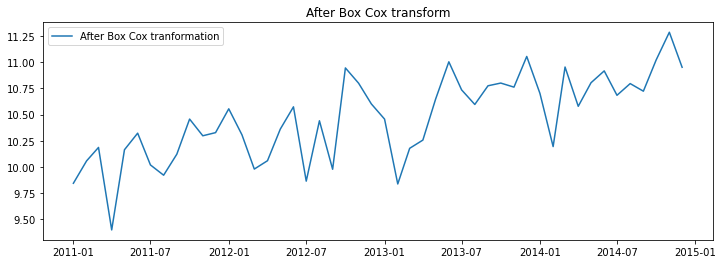

In [49]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data_market_seg_agg['Sales'], lmbda=0), index = data_market_seg_agg.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

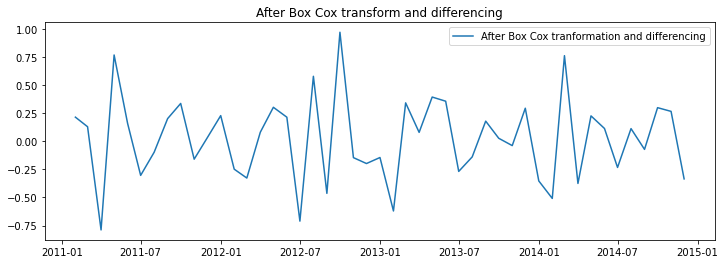

In [50]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_market_seg_agg.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

The time series data seems to have constant mean after differencing. The series seems to be stationary now.

In [51]:
data_boxcox_diff.dropna(inplace=True)

### Splitting into train and test

In [52]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### Auto regression method (AR)

In [53]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [54]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

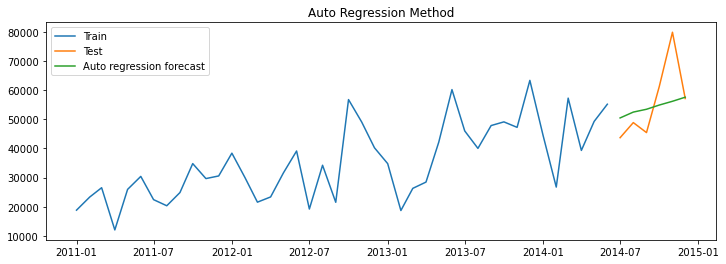

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_market_seg.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_ar['ar_forecast'][test_market_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_ar['ar_forecast'][test_market_seg.index.min():])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


This model has captured the trend well. Though we have not used PACF to determine lag order 'p' and chosen by default as 1, the model seems to have performed well as seen by low MAPE value.

### Moving Average method (MA)

In [57]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


In [58]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

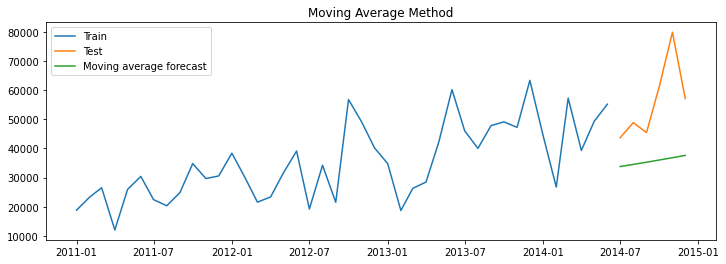

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_market_seg.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_ma['ma_forecast'][test_market_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_ma['ma_forecast'][test_market_seg.index.min():])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


This model has captured the trend well but not the level. The model has not performed well as seen by high RMSE and MAPE value.

### Auto regression moving average method (ARMA)

In [61]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [62]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

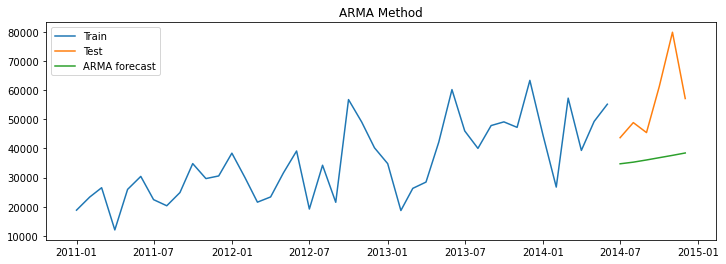

In [63]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_market_seg.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


Due to combination of MA with AR to give ARMA, the model has not been able to capture the level well. This model has performed poorly. 

### Auto regressive integrated moving average (ARIMA)

In [65]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [66]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

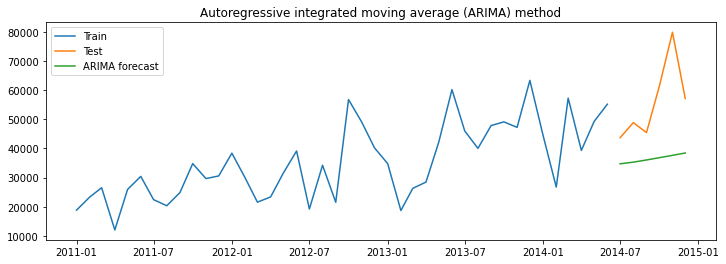

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_market_seg.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [68]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_arima['arima_forecast'][test_market_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_arima['arima_forecast'][test_market_seg.index.min():])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


ARIMA is similar to ARMA with the difference being that differencing of time series is performed by ARIMA model itself. This model has same poor performance as that of ARMA

### SARIMA

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041707
ma.L1      -0.996527
ar.S.L12    0.099600
ma.S.L12   -0.966989
sigma2      0.058539
dtype: float64


In [70]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

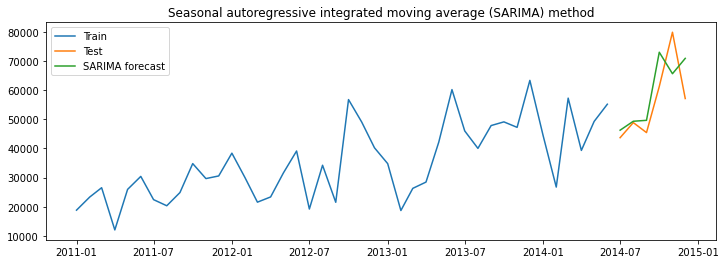

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train_market_seg['Sales'], label='Train')
plt.plot(test_market_seg['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_market_seg.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [72]:
rmse = np.sqrt(mean_squared_error(test_market_seg['Sales'], y_hat_sarima['sarima_forecast'][test_market_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_market_seg['Sales']-y_hat_sarima['sarima_forecast'][test_market_seg.index.min():])/test_market_seg['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9616.49,12.87


SARIMA is Seasonal ARIMA. The level, trend and seasonal components have been captured well. This model has performed best among ARIMA models because it captured seasonal component well.

# Conclusion

- We tested different exponential models and ARIMA models on the Retail Giant Sales dataset.
- Among exponential models, Holt Winters' additive model performed the best as seasonal component is captured in this model and was captured well.
- Among ARIMA models, SARIMA model performed the best as seasonal component is captured in this model and was captured well.
- All in all, even if trend and level components were captured by some models, the capture of seasonal component decreased the RMSE and MAPE to a great extent.  

Final MAPE values for each model were

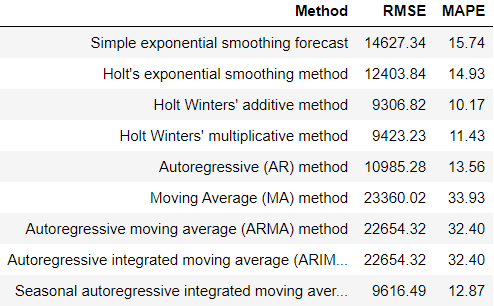